# Neural Network

## 1 Principle Introduction

### 1.1 Neuron

Artifical neural network attempt to simplify and mimic the behavior of our brains. The basic unit in the neural network is neuron. In artifical neural network, a neuron could have multiple inputs and multiple outputs. The output could be calculated using following equations.  
$$y_1 = f(w_{1,1} x_1 + w_{1,2} x_2 + b)$$
$$y_2 = f(w_{2,1} x_1 + w_{2,2} x_2 + b)$$  
$w$ is the weight, $b$ is the bias and $f(\cdot)$ is the activation function. In the matrix form, the above equations could be represented using.   
$$\textbf{y} = f(\textbf{W} \cdot \text{x} + \textbf{b})$$  
where,  
$$\textbf{y} = \left[ \begin{matrix} y_1 \\ y_2 \end{matrix} \right] \ \ \ \ \textbf{W} = \left[ \begin{matrix} w_{1,1} & w_{1,2} \\ w_{2,1} & w_{2,2} \end{matrix} \right] \ \ \ \  \textbf{b} = \left[ \begin{matrix} b_1 \\ b_2 \end{matrix} \right]$$

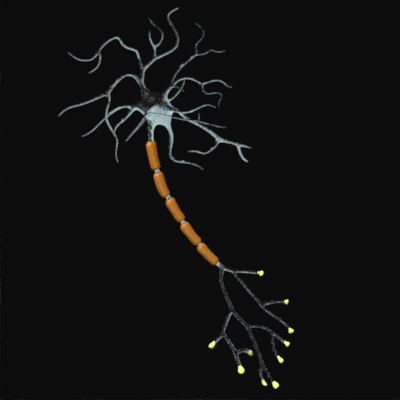

In [9]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/neuron-cell-3d-model_D.JPG", width=400, height=400)
# https://www.turbosquid.com/3d-models/neuron-cell-3d-model/336443

### 1.2 Activiation function

As mentioned above, every neuron does not only calculate the weighted sum of inputs $\textbf{W} \cdot \text{x} + \textbf{b}$, it also needs a activiation function to introduce non-linearity. In this section, several activiation functions $f(\cdot)$ would be introduced.

#### Sigmoid function

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

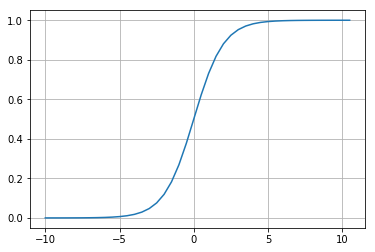

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# write the sigmoid function
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y


x = np.arange(-10,11,0.5)
y = sigmoid(x)
plt.plot(x,y)
plt.grid()
plt.show()

If $x$ is very large and approaching positive infinity, the $y$ equals to 1. If $x$ is very approaching negative infinite, the $y$ equals to 0. In the range around zero point, the relationship between $x$ and $y$ is approximately linear. 

#### Tanh function

$$tanh(x) = \frac{2}{1+e^{-2x}}-1$$

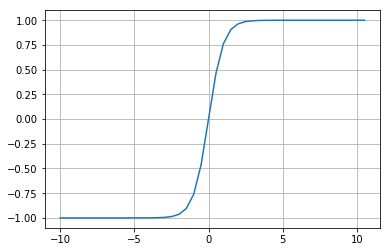

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def tahn(x):
    y = 2/(1+np.exp(-2*x)) - 1
    return y

x = np.arange(-10,11,0.5)
y = tahn(x)
plt.plot(x,y)
plt.grid()
plt.show()

Similar to the sigmoid function, when $x$ is approaching to positive and negative infinity, the $y$ is 1 and 0 respectively. However the linear range of tanh fucntion is narrower than sigmoid function.

#### ReLu Function

$$ReLu(x) = max(0, x)$$

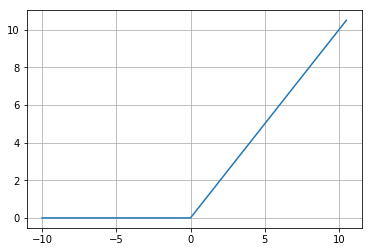

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    y = x * (x>0)
    return y

x = np.arange(-10,11,0.5)
y = relu(x)
plt.plot(x,y)
plt.grid()
plt.show()

The range of ReLU function is from zero to postive inifinity.

### 1.3 Neural networks

After introducing the neurons and basic calculation in that, now we try to build up a neural network using neurons. Taking the following picture as an example, there are four layers, which are input layer, hidden layer 1, hidden layer 2 and out put layer. Input layer has three neurons. Hidden layer 1 and hidden layer 2 have four neurons. Output layer only has one neuron.


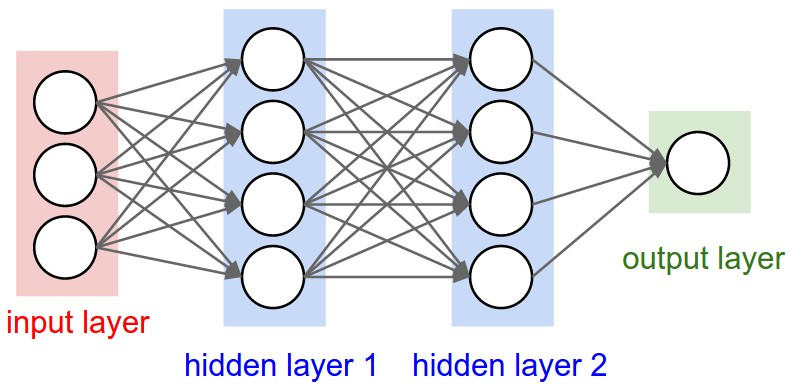

In [30]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/simple_neural_network.JPG", width=600, height=600)
# https://www.turbosquid.com/3d-models/neuron-cell-3d-model/336443

In the above figure, a circle means a neuron and a connection (line with a arrow) means the directionality of data. The number of neurons in the input layer is dependent on the dimension of features and the number of neurons in the output layer is dependent on the dimension of target.

#### Mathematical representation

Firstly we number the layers like that input layer is layer 0, hidden layer 1 is layer 1, hiden layer 2 is layer 2 and output layer is layer 4. $\textbf{h}^{(1)}$ and $\textbf{h}^{(2)}$ represent the values of neurons at layer 1 and layer 2. $\textbf{W}^{(0)}$ and $\textbf{b}^{(0)}$ are weights and bias at layer 0. Forward propagation, e.g. calculation in this neural network, could be represented using the following equations.
$$\textbf{h}^{(1)} = f^{(1)}(\textbf{W}^{(0)} \textbf{x} + \textbf{b}^{(0)})$$
$$\textbf{h}^{(2)} = f^{(2)}(\textbf{W}^{(1)} (\textbf{h}^{(1)}) + \textbf{b}^{(1)})$$
$$\hat{\textbf{y}} = f^{(3)}(\textbf{W}^{(2)} (\textbf{h}^{(2)}) + \textbf{b}^{(2)})$$  

Notice that, the notation like $f^{(1)}(\cdot)$, $f^{(2)}(\cdot)$ and $f^{(3)}(\cdot)$ is not a single activiation function but a set of activation fuction. As the above figure, taking hidden layer 1 as an example, four neurons have four independent activiation functions, but in order to express the forward propagation simply, we do not write every single activation fucntion respectively. At the same, we have:  

$$\textbf{W}^{(0)} = \left[ \begin{matrix} w_{1,1}^{(0)} & w_{1,2}^{(0)} & w_{1,3}^{(0)} \\ w_{2,1}^{(0)} & w_{2,2}^{(0)} & w_{2,3}^{(0)} \\ w_{3,1}^{(0)} & w_{3,2}^{(0)} & w_{3,3}^{(0)} \\ w_{4,1}^{(0)} & w_{4,2}^{(0)} & w_{4,3}^{(0)} \end{matrix} \right]$$  
$$\textbf{W}^{(1)} = \left[ \begin{matrix} w_{1,1}^{(1)} & w_{1,2}^{(1)} & w_{1,3}^{(1)} & w_{1,4}^{(1)} \\ w_{2,1}^{(1)} & w_{2,2}^{(1)} & w_{2,3}^{(1)} & w_{2,4}^{(1)}\\ w_{3,1}^{(1)} & w_{3,2}^{(1)} & w_{3,3}^{(1)} & w_{3,4}^{(1)} \\ w_{4,1}^{(1)} & w_{4,2}^{(1)} & w_{4,3}^{(1)} & w_{4,4}^{(1)} \end{matrix} \right]$$  
$$\textbf{W}^{(2)} = \left[ \begin{matrix} w_{1,1}^{(2)} & w_{1,2}^{(2)} & w_{1,3}^{(2)} & w_{1,4}^{(2)}  \end{matrix} \right]$$

#### Gradient descent and optimisation

We could see that the above three equations could be ragarded as a model, and the input of the model is $\textbf{x}$ and output is $\textbf{y}$. We we train this model, we need to optimize $\textbf{W}$. We define this model as $\hat{\textbf{y}} = H(\textbf{x})$.

Assuming that here we use mean squared error as cost funtion.
$$J(w, b) = \frac{1}{2} \sum_{i=0}^{m} $$

## 2 Application

In this note book, MNIST database, which includes 28x28 grayscale images of the 10 digits, will be used to train and test a neural netowrk. Moreover, from this notebook, we start to use keras, an open-source neural-network library written in Python, to build up neural network. MNIST dataset has been prepared in the library keras, so we could just import it from keras.

In [1]:
# import datsets
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# check the dimension of training set and testing set
print('The dimension of training set:', x_train.shape)
print('The dimension of testing set:', x_test.shape)

Using TensorFlow backend.


The dimension of training set: (60000, 28, 28)
The dimension of testing set: (10000, 28, 28)


In [2]:
from keras.utils import to_categorical

# transfer y to one-hot vector
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# reshape x to reach the requirements of the neural network
x_train = x_train.reshape(x_train.shape[0], 28*28) 
x_test = x_test.reshape(x_test.shape[0], 28*28)
print('The dimension of training set:', x_train.shape)
print('The dimension of testing set:', x_test.shape)

The dimension of training set: (60000, 784)
The dimension of testing set: (10000, 784)


Then build up the neural network

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# parameters of neural network
image_size = 784 # 28*28=784
num_classes = 10

# define a sequential model
model = Sequential()

# add layers to teh sequential model
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax')) 

# use the following function to print the architecture of network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Compile the neural network

In [19]:
# compile the model, defining optimizing aglorithm, loss function and metrics.
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s 33us/step - loss: 1.3917 - acc: 0.6943 - val_loss: 0.7305 - val_acc: 0.8690
Epoch 2/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.5922 - acc: 0.8601 - val_loss: 0.4276 - val_acc: 0.8925
Epoch 3/100
54000/54000 [==============================] - 1s 28us/step - loss: 0.4573 - acc: 0.8749 - val_loss: 0.3630 - val_acc: 0.8978
Epoch 4/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.4171 - acc: 0.8784 - val_loss: 0.3362 - val_acc: 0.9025
Epoch 5/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.3782 - acc: 0.8873 - val_loss: 0.3135 - val_acc: 0.9030
Epoch 6/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.3575 - acc: 0.8937 - val_loss: 0.3002 - val_acc: 0.9115
Epoch 7/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.3399 - acc: 0.8984 - val_loss: 0.2877 - v

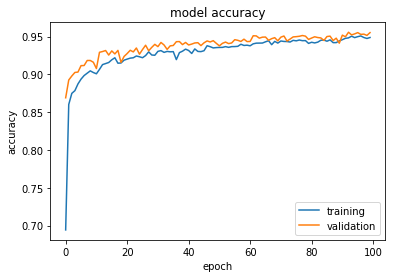

accurarcy on testing set: 0.9452


In [21]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=.1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print('accurarcy on testing set:', accuracy)